<a href="https://colab.research.google.com/github/sruthib22/DS601_Fall21/blob/main/week_04/Homework_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
df = pd.read_csv("RollingSystemDemand_20210929_0417.csv")

print(df)

                HDR  ROLLING SYSTEM DEMAND
VD   20210907000000                24683.0
VD   20210907000500                24452.0
VD   20210907001000                24270.0
VD   20210907001500                24224.0
VD   20210907002000                24112.0
..              ...                    ...
VD   20210913222000                24913.0
VD   20210913222500                24512.0
VD   20210913223000                24291.0
VD   20210913223500                24254.0
FTR            2000                    NaN

[2001 rows x 2 columns]


In [19]:
df.columns

Index(['HDR', 'ROLLING SYSTEM DEMAND'], dtype='object')

In [20]:
df.columns = ['time','demand']
df

,time,demand
VD,20210907000000,24683.0
VD,20210907000500,24452.0
VD,20210907001000,24270.0
VD,20210907001500,24224.0
VD,20210907002000,24112.0
...,...,...
VD,20210913222000,24913.0
VD,20210913222500,24512.0
VD,20210913223000,24291.0
VD,20210913223500,24254.0


In [5]:
df['time'] = df['time'].astype(str)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2001 entries, VD to FTR
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    2001 non-null   object 
 1   demand  2000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 46.9+ KB


In [7]:
demand_total = df['demand']

In [8]:
print(demand_total)

VD     24683.0
VD     24452.0
VD     24270.0
VD     24224.0
VD     24112.0
        ...   
VD     24913.0
VD     24512.0
VD     24291.0
VD     24254.0
FTR        NaN
Name: demand, Length: 2001, dtype: float64


In [9]:
df['date_time'] = pd.to_datetime(df['time'])

In [10]:
df.head(24)

,time,demand,date_time
VD,20210907000000,24683.0,2021-09-07 00:00:00
VD,20210907000500,24452.0,2021-09-07 00:05:00
VD,20210907001000,24270.0,2021-09-07 00:10:00
VD,20210907001500,24224.0,2021-09-07 00:15:00
VD,20210907002000,24112.0,2021-09-07 00:20:00
VD,20210907002500,24051.0,2021-09-07 00:25:00
VD,20210907003000,24001.0,2021-09-07 00:30:00
VD,20210907003500,24074.0,2021-09-07 00:35:00
VD,20210907004000,24060.0,2021-09-07 00:40:00
VD,20210907004500,23995.0,2021-09-07 00:45:00


In [11]:
df['date_time']= pd.to_datetime(df.date_time, format ='%Y%m%d%H').dt.strftime('%m-%d :%H hr')

In [12]:
datetime_value = df['date_time']
print(datetime_value)

VD     09-07 :00 hr
VD     09-07 :00 hr
VD     09-07 :00 hr
VD     09-07 :00 hr
VD     09-07 :00 hr
           ...     
VD     09-13 :22 hr
VD     09-13 :22 hr
VD     09-13 :22 hr
VD     09-13 :22 hr
FTR    01-01 :00 hr
Name: date_time, Length: 2001, dtype: object


In [13]:
df['hours']= pd.to_datetime(df.date_time, format ='%m-%d :%H hr').dt.strftime('%H')
df

,time,demand,date_time,hours
VD,20210907000000,24683.0,09-07 :00 hr,00
VD,20210907000500,24452.0,09-07 :00 hr,00
VD,20210907001000,24270.0,09-07 :00 hr,00
VD,20210907001500,24224.0,09-07 :00 hr,00
VD,20210907002000,24112.0,09-07 :00 hr,00
...,...,...,...,...
VD,20210913222000,24913.0,09-13 :22 hr,22
VD,20210913222500,24512.0,09-13 :22 hr,22
VD,20210913223000,24291.0,09-13 :22 hr,22
VD,20210913223500,24254.0,09-13 :22 hr,22


In [14]:
demandValue = df['demand']

In [22]:
per_hour_demand = []
count = 0
val = 1
for i in df['demand']:
  count = count + i
  if val<12:
    val = val + 1
  else:
    per_hour_demand.append(count)
    val = 1
    count = 0

print(per_hour_demand)

[289791.0, 280516.0, 277825.0, 274702.0, 285821.0, 318960.0, 358431.0, 373296.0, 372037.0, 362023.0, 358491.0, 362873.0, 359275.0, 357319.0, 359489.0, 378710.0, 398593.0, 404446.0, 398529.0, 394454.0, 369608.0, 339235.0, 309454.0, 288665.0, 277201.0, 275600.0, 272105.0, 273195.0, 272993.0, 305391.0, 348864.0, 365920.0, 361634.0, 357053.0, 353521.0, 352741.0, 349193.0, 349735.0, 354011.0, 375232.0, 396326.0, 402828.0, 403637.0, 400021.0, 374953.0, 355315.0, 330293.0, 306221.0, 290858.0, 286402.0, 283186.0, 283410.0, 293285.0, 326940.0, 360291.0, 377059.0, 381687.0, 377106.0, 374904.0, 375283.0, 370807.0, 365241.0, 364391.0, 386865.0, 402620.0, 405807.0, 403326.0, 395283.0, 374328.0, 352543.0, 327308.0, 304539.0, 289802.0, 283238.0, 278235.0, 279605.0, 285929.0, 324573.0, 358057.0, 374744.0, 379886.0, 375526.0, 377173.0, 376707.0, 371103.0, 363975.0, 361347.0, 371491.0, 385964.0, 390062.0, 388970.0, 378719.0, 357470.0, 331197.0, 301189.0, 275764.0, 270797.0, 266223.0, 258651.0, 256048.0,

In [23]:
list1 = [x for x in range(1,25)]
print(list1)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [27]:
per_day = per_hour_demand[:24]
print(per_day)

[289791.0, 280516.0, 277825.0, 274702.0, 285821.0, 318960.0, 358431.0, 373296.0, 372037.0, 362023.0, 358491.0, 362873.0, 359275.0, 357319.0, 359489.0, 378710.0, 398593.0, 404446.0, 398529.0, 394454.0, 369608.0, 339235.0, 309454.0, 288665.0]


In [28]:
df_graph = pd.DataFrame(per_day)

In [29]:
df_graph

,0
0,289791.0
1,280516.0
2,277825.0
3,274702.0
4,285821.0
5,318960.0
6,358431.0
7,373296.0
8,372037.0
9,362023.0


In [30]:
df_graph.columns=['24_hrs']

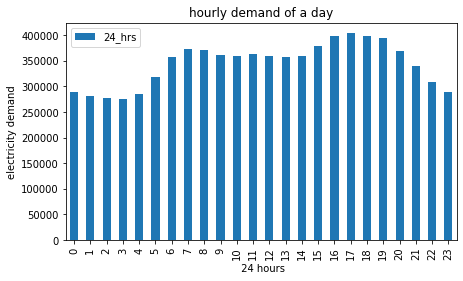

In [36]:
import matplotlib.pyplot as plt

df_graph.plot.bar(figsize = (7,4))
plt.title('hourly demand of a day')
plt.xlabel(' 24 hours')
plt.ylabel('electricity demand')
plt.show()

In [32]:
df_24_day = pd.DataFrame(per_hour_demand)

In [33]:
df_24_day

,0
0,289791.0
1,280516.0
2,277825.0
3,274702.0
4,285821.0
...,...
161,408541.0
162,406159.0
163,396950.0
164,362597.0


In [34]:
df_24_day.columns = ['demand_for_10_days']

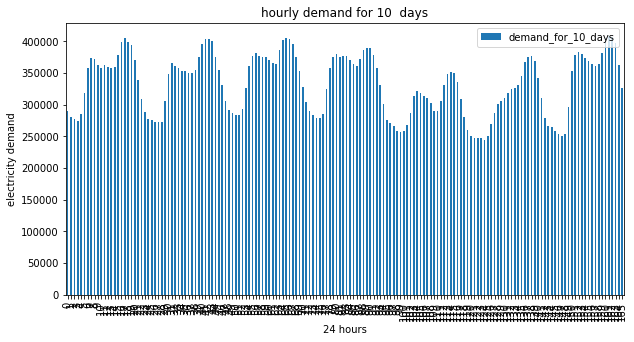

In [37]:
import matplotlib.pyplot as plt

df_24_day.plot.bar(figsize = (10,5))
plt.title('hourly demand for 10  days')
plt.xlabel('24 hours')
plt.ylabel('electricity demand')
plt.show()